In [1]:
#30DayMapChallenge Day 4: Green
#Heat map of OL Reign shots over a stretch of 7 games in the summer of 2018
#Python #Jupyter #dataviz #BoldTogether #mplso
#Data Source: @StatsBomb 
#Code Basis: @mplsoccer_dev

In [2]:
import matplotlib.patheffects as path_effects
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter

from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen

# get data
parser = Sbopen()
match_files = [7480, 7485, 7472, 7478, 7493, 7523,7443]
df = pd.concat([parser.event(file)[0] for file in match_files])  # 0 index is the event file
# filter OL Reign shot and pass events
mask_ol_pressure = (df.team_name == 'OL Reign') & (df.type_name == 'Shot')
df_pressure = df.loc[mask_ol_pressure, ['x', 'y']]
print(df_pressure)
mask_ol_pressure = (df.team_name == 'OL Reign') & (df.type_name == 'Pass')
df_pass = df.loc[mask_ol_pressure, ['x', 'y', 'end_x', 'end_y']]

          x     y
167   103.0  47.0
414   102.0  56.0
973   111.0  40.0
1273   93.0  40.0
1793  117.0  30.0
...     ...   ...
2077   96.0  45.0
2099  108.0  40.0
2386  106.0  50.0
2431  113.0  44.0
2447   90.0  49.0

[105 rows x 2 columns]


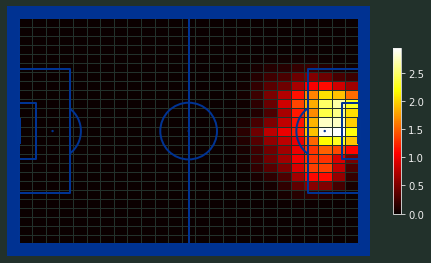

In [3]:
# setup pitch
pitch = Pitch(pitch_type='statsbomb', line_zorder=2,
              pitch_color='#003292', line_color='#003393')
# draw
fig, ax = pitch.draw(figsize=(6.6, 4.125))
fig.set_facecolor('#22312b')
bin_statistic = pitch.bin_statistic(df_pressure.x, df_pressure.y, statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='hot', edgecolors='#22312b')
# Add the colorbar and format off-white
cbar = fig.colorbar(pcm, ax=ax, shrink=0.6)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#efefef')
ticks = plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')

In [4]:
# fontmanager for google font (robotto)
robotto_regular = FontManager()

# path effects
path_eff = [path_effects.Stroke(linewidth=1.5, foreground='#003292'),
            path_effects.Normal()]

# see the custom colormaps example for more ideas on setting colormaps
pearl_earring_cmap = LinearSegmentedColormap.from_list("Emerald - 10 colors",
                                                       ['#15242e', '#4393c4'], N=10)

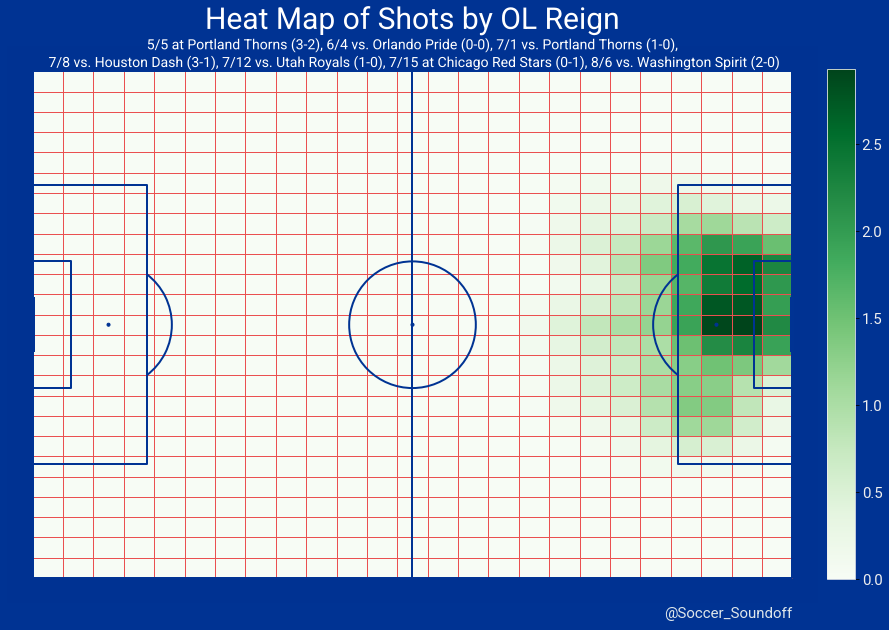

In [5]:
fig, axs = pitch.grid(endnote_height=0.03, endnote_space=0,
                      # leave some space for the colorbar
                      grid_width=0.88, left=0.025,
                      title_height=0.06, title_space=0,
                      # Turn off the endnote/title axis. I usually do this after
                      # I am happy with the chart layout and text placement
                      axis=False,
                      grid_height=0.86)
fig.set_facecolor('#003393')

# plot heatmap
bin_statistic = pitch.bin_statistic(df_pressure.x, df_pressure.y, statistic='count', bins=(25, 25))
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=axs['pitch'], cmap='Greens', edgecolors='#EA5050')

# add cbar
ax_cbar = fig.add_axes((0.915, 0.093, 0.03, 0.786))
cbar = plt.colorbar(pcm, cax=ax_cbar)
cbar.outline.set_edgecolor('#efefef')
cbar.ax.yaxis.set_tick_params(color='#000000')
plt.setp(plt.getp(cbar.ax.axes, 'yticklabels'), color='#efefef')
for label in cbar.ax.get_yticklabels():
    label.set_fontproperties(robotto_regular.prop)
    label.set_fontsize(15)

# endnote and title
axs['endnote'].text(1, 0.5, '@Soccer_Soundoff', va='center', ha='right', fontsize=15,
                    fontproperties=robotto_regular.prop, color='#dee6ea')
ax_title = axs['title'].text(0.5, 0.65, "Heat Map of Shots by OL Reign", color='white',
                             va='center', ha='center', path_effects=path_eff,
                             fontproperties=robotto_regular.prop, fontsize=30)
ax_title = axs['title'].text(0.5, -0.2, "5/5 at Portland Thorns (3-2), 6/4 vs. Orlando Pride (0-0), 7/1 vs. Portland Thorns (1-0),\n 7/8 vs. Houston Dash (3-1), 7/12 vs. Utah Royals (1-0), 7/15 at Chicago Red Stars (0-1), 8/6 vs. Washington Spirit (2-0)", color='white',
                             va='center', ha='center', path_effects=path_eff,
                             fontproperties=robotto_regular.prop, fontsize=14)